# Part 1 (A6) - Explore and Define questions

Taso Kinnas

In [2]:
library(tidyverse) #general tidyverse functions
# library(lubridate) #tidyverse functions for setting up date formats

In [3]:
# sets plot height to 3.5 inches
options(repr.plot.height=3.5)

## 1. Project goals:

The company I work for, Impact Group, LLC, is a retail brokerge firm specializing in consumer packaged goods(grocery). We help food manufactuers sell products via grocery stores. The goal of this project is to see if insights can be gained to better market the products of the clients we represent.  Examples include identifying when to promote a certain product, how long to promote it, or if there are complimentary products to promote to boost overall sales to name a few. 

## 2. Data Source:
<b>Please Note:</b> The data is proprietary to Impact Group, LLC and provided for use solely for the purposes of this project.

Our dataset in its entirety is about twelve terabytes in total.  While I think it would be interesting to explore it in it's entirety, for the purposes of this assignment I filtered on a more manageable size to quickly process the data and provide a data source that could be sent to the professor in a practical manner.

As such, this is filtered on sales data of the brands that we represent in Whole Foods Market.  Further, it is filtered on the Pacific Northwest region(Washington, Oregon, and Idaho).  The records include attributes for store, zip code, date, current year sales & units sold, prior years sales & units sold, UPC, product description, brand and category. (I need to re-pull a dataset that includes the category and I will dig a little deeper to see if there are other features to potentially include other features that could answer questions, like utilizing address data with census data for incomes, etc.). 

In [4]:
# read data file, convert columns to relevant data types
# all data (can't use file as zipped...)
#wfm = read_tsv('data/wholefoods/wfm_final.tsv', col_types="cccccccDddddcccc")
# filtered on region 7 (pacific northwest)
wfm = read_tsv('data/wholefoods/wfm_final_r7.zip', col_types="cccccccDddddcccc")
spec(wfm)
head(wfm)

cols(
  Region = col_character(),
  CustNum = col_character(),
  Store = col_character(),
  Address = col_character(),
  City = col_character(),
  StateAbr = col_character(),
  zip = col_character(),
  Date = col_date(format = ""),
  Sales = col_double(),
  SalesLy = col_double(),
  Units = col_double(),
  UnitsLy = col_double(),
  Brand = col_character(),
  Category = col_character(),
  UPC = col_character(),
  Description = col_character()
)

Region,CustNum,Store,Address,City,StateAbr,zip,Date,Sales,SalesLy,Units,UnitsLy,Brand,Category,UPC,Description
Pacific Northwest,10407,Bend,2610 Highway 2,Bend,OR,97701,2016-01-04,1.79,7.96,1,4,Lotus Foods,Ramen,70895360103,Rice Ramen Millet And Brown Og (2.8oz)
Pacific Northwest,10407,Bend,2610 Highway 2,Bend,OR,97701,2016-01-04,65.89,23.96,11,4,Purely Elizabeth,Granola,85514000216,Granola Blueberry Hemp (12oz)
Pacific Northwest,10407,Bend,2610 Highway 2,Bend,OR,97701,2016-01-04,17.37,0.00,3,0,Purely Elizabeth,Muesli,85514000246,Muesli Mango Almond (10oz)
Pacific Northwest,10407,Bend,2610 Highway 2,Bend,OR,97701,2016-01-04,5.99,5.99,1,1,Lotus Foods,Ramen 4 Pack,70895360202,Rice Ramen Jade Pearl Og 4 Pck (10oz)
Pacific Northwest,10407,Bend,2610 Highway 2,Bend,OR,97701,2016-01-04,11.14,0.00,6,0,Lotus Foods,Ramen,70895360104,Rice Ramen Purple Potato Brown Rice (2.8oz)
Pacific Northwest,10407,Bend,2610 Highway 2,Bend,OR,97701,2016-01-04,18.00,11.56,6,4,Lotus Foods,Rice Bowl,70895350498,Rice Bowl Brown Jasmine Og (7.4oz)


## 3. Data Summary:

In [5]:
# summary of relevant data
summary(wfm)

    Region            CustNum             Store             Address         
 Length:987295      Length:987295      Length:987295      Length:987295     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     City             StateAbr             zip                 Date           
 Length:987295      Length:987295      Length:987295      Min.   :2016-01-04  
 Class :character   Class :character   Class :character   1st Qu.:2016-04-04  
 Mode  :character   Mode  :character   Mode  :character   Median :2016-07-04  
                                                          Mean   :2016-07-03  
                                                          3rd Qu.:

In [6]:
# Rank brands, showing last one to see number of brands 
wfm_sales_by_brand = wfm %>%     
    group_by(Brand) %>%
    summarize(salesTY=sum(Sales)) %>%
    arrange(-salesTY) %>%
    mutate(b_rank=row_number())
tail(wfm_sales_by_brand,1)

Brand,salesTY,b_rank
Edward & Sons,0,49


In [14]:
# Rank UPS, showing last one to see number of products we represent for Whole Foods 
wfm_sales_by_upc = wfm %>%     
    group_by(UPC) %>%
    summarize(salesTY=sum(Sales)) %>%
    arrange(-salesTY) %>%
    mutate(u_rank=row_number())
tail(wfm_sales_by_upc,1)

UPC,salesTY,u_rank
39978043221,-27.96,2214


In [15]:
# Join with Brand (for some graphing later)
wfm_product_in_brand = wfm %>%
    group_by(UPC, Description, Brand) %>%
    summarize(salesTY=sum(Sales)) %>%
    select(UPC, Description, Brand) %>%
    inner_join(wfm_sales_by_upc)
tail(wfm_product_in_brand,1)

Joining, by = "UPC"


UPC,Description,Brand,salesTY,u_rank
9931,Rice Black Forbidden Og (1lb),Lotus Foods,21114.89,172


#### Note: I will also have a category feature that I thought I included, but didn't.  This will be part of final project.

# Brand Graphs

In [8]:
# get sales and units totals by week for each brand
wfm_sales_date_brand = wfm %>%     
    group_by(Date, Brand) %>%
    summarize(salesTY=sum(Sales), unitsTY=sum(Units), salesLY=sum(SalesLy), unitsLY=sum(UnitsLy))
head(wfm_sales_date_brand)

Date,Brand,salesTY,unitsTY,salesLY,unitsLY
2016-01-04,Alter Eco,9031.39,2835.10,9696.52,2474.09
2016-01-04,Amazing Grass,15869.52,1506.00,9648.30,1225.00
2016-01-04,Amy's,48381.84,11526.00,41524.22,10090.00
2016-01-04,Barkthins,1060.91,210.00,0.00,0.00
2016-01-04,Blue Diamond,5558.13,1865.00,6165.30,2242.00
2016-01-04,Bob's Red Mill,24621.83,4425.82,24859.38,4485.46


In [9]:
# calculate sales per unit for top 5 brands
top_5_brands = wfm_sales_by_brand %>%
    select(Brand, b_rank) %>%
    inner_join(wfm_sales_date_brand) %>%
    mutate(CpU =salesTY/unitsTY) %>%
    filter(b_rank<=5)
head(top_5_brands)

Joining, by = "Brand"


Brand,b_rank,Date,salesTY,unitsTY,salesLY,unitsLY,CpU
Amy's,1,2016-01-04,48381.84,11526,41524.22,10090,4.197626
Amy's,1,2016-01-11,41204.81,9514,34735.04,8278,4.330966
Amy's,1,2016-01-18,38572.01,8892,36784.73,8667,4.337833
Amy's,1,2016-01-25,44105.28,9949,44782.33,11332,4.433137
Amy's,1,2016-02-01,47166.87,10735,47842.48,12315,4.393747
Amy's,1,2016-02-08,41315.72,9474,36162.97,8759,4.360958


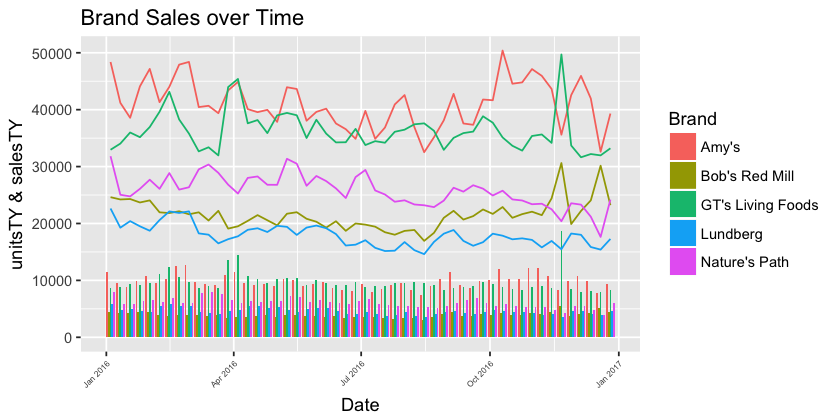

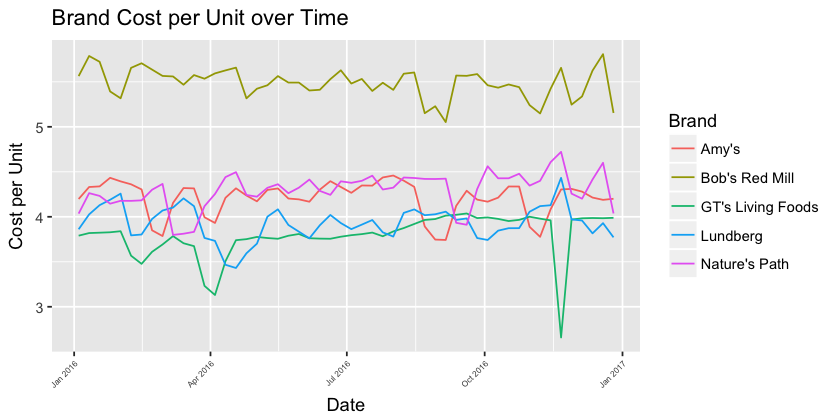

In [10]:
# plot of sales and units for top 5 brands
fancyplot_brand = ggplot(top_5_brands, aes(x=Date, y=unitsTY, fill=Brand)) +
    geom_bar(stat="identity", position="dodge") +
    geom_line(aes(x=Date, y=salesTY, color=Brand)) +
    theme(axis.text.x = element_text(size=5, angle=45, hjust=1)) +
    labs(title="Brand Sales over Time", y="unitsTY & salesTY")

# plot of cost per unit for top 5 brands
cpuplot_brand = ggplot(top_5_brands, aes(x=Date, y=CpU, color=Brand)) +
    geom_line() +
    theme(axis.text.x = element_text(size=5, angle=45, hjust=1)) +
    labs(title="Brand Cost per Unit over Time", y="Cost per Unit")
fancyplot_brand
cpuplot_brand

# UPC Graph

In [11]:
# get sales and units totals by week for each product
wfm_sales_date_upc = wfm %>%     
    group_by(Date, UPC) %>%
    summarize(salesTY=sum(Sales), unitsTY=sum(Units), salesLY=sum(SalesLy), unitsLY=sum(UnitsLy))
head(wfm_sales_date_upc)

Date,UPC,salesTY,unitsTY,salesLY,unitsLY
2016-01-04,1173,719.81,51.45,605.65,67.37
2016-01-04,1553210080,20.34,6.00,596.64,176.00
2016-01-04,1553210081,315.27,93.00,352.56,104.00
2016-01-04,1553210082,3.39,1.00,359.34,106.00
2016-01-04,1553210083,396.63,117.00,335.61,99.00
2016-01-04,1553210084,55.86,14.00,159.33,47.00


In [12]:
# calculate sales per unit for top 5 products
top_5_upc = wfm_product_in_brand %>%
    select(UPC, u_rank) %>%
    inner_join(wfm_sales_date_upc) %>%
    mutate(CpU =salesTY/unitsTY) %>%
    filter(u_rank<=5)
head(top_5_upc)

Adding missing grouping variables: `Description`
Joining, by = "UPC"


Description,UPC,u_rank,Date,salesTY,unitsTY,salesLY,unitsLY,CpU
Yerba Mate Revel Berry OG (15.5oz),63243273777,5,2016-01-04,1449.53,608,1447.86,607,2.384095
Yerba Mate Revel Berry OG (15.5oz),63243273777,5,2016-01-11,1493.75,627,1477.02,618,2.382376
Yerba Mate Revel Berry OG (15.5oz),63243273777,5,2016-01-18,1447.38,608,1414.40,593,2.380559
Yerba Mate Revel Berry OG (15.5oz),63243273777,5,2016-01-25,1840.82,1256,1611.24,810,1.465621
Yerba Mate Revel Berry OG (15.5oz),63243273777,5,2016-02-01,2072.73,1402,1766.98,935,1.478409
Yerba Mate Revel Berry OG (15.5oz),63243273777,5,2016-02-08,1728.19,878,2280.85,1211,1.968326


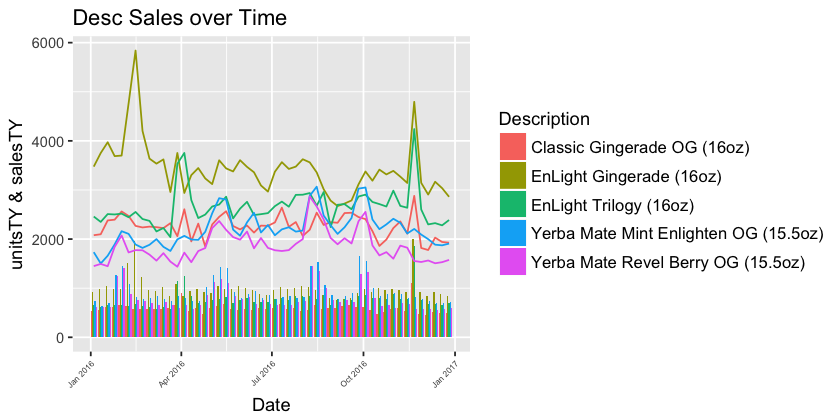

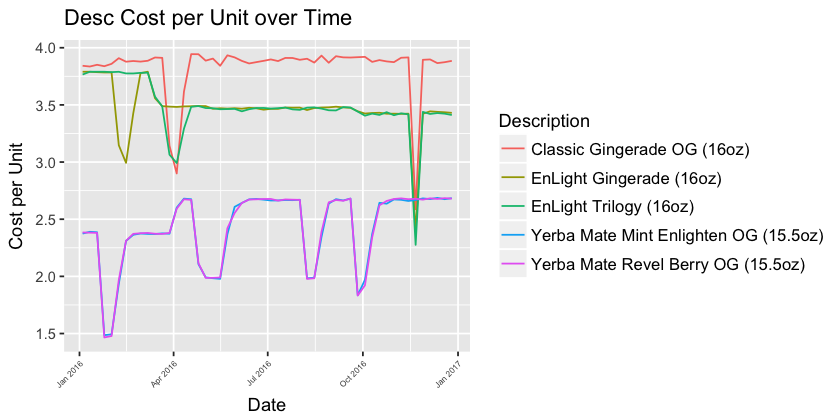

In [13]:
# plot of sales and units for top 5 products by UPC
# not currently using, used description instead
fancyplot_upc = ggplot(top_5_upc, aes(x=Date, y=unitsTY, fill=UPC)) +
    geom_bar(stat="identity", position="dodge") +
    geom_line(aes(x=Date, y=salesTY, color=UPC)) +
    theme(axis.text.x = element_text(size=5, angle=45, hjust=1)) +
    labs(title="UPC Sales over Time", y="unitsTY & salesTY")
# plot of cost per unit for top 5 products by UPC
# not currently using, used description instead
cpuplot_upc = ggplot(top_5_upc, aes(x=Date, y=CpU, color=UPC)) +
    geom_line() +
    theme(axis.text.x = element_text(size=5, angle=45, hjust=1)) +
    labs(title="UPC Cost per Unit over Time", y="Cost per Unit")

# plot of sales and units for top 5 products by product description
fancyplot_desc = ggplot(top_5_upc, aes(x=Date, y=unitsTY, fill=Description)) +
    geom_bar(stat="identity", position="dodge") +
    geom_line(aes(x=Date, y=salesTY, color=Description)) +
    theme(axis.text.x = element_text(size=5, angle=45, hjust=1), legend.text=element_text(size=10)) +
    labs(title="Desc Sales over Time", y="unitsTY & salesTY")

# plot of cost per unit for top 5 products by product description
cpuplot_desc = ggplot(top_5_upc, aes(x=Date, y=CpU, color=Description)) +
    geom_line() +
    theme(axis.text.x = element_text(size=5, angle=45, hjust=1), legend.text=element_text(size=10)) +
    labs(title="Desc Cost per Unit over Time", y="Cost per Unit")

#fancyplot_upc
fancyplot_desc
#cpuplot_upc
cpuplot_desc

## 4. Research Questions:

1. Can I determine the benefit of a promotion based on what I set promotional price for?
2. Identify unintuitive complimentary products (or identify correlations that would warrent further investigation?)
3. Timing of promotions:
    * impact of co-promotion complimentary products versus just promoting one complimentary product
    * possibly identify frequency (times per year) of promoting a product
    * identify length of time to promote a product
4. Do product/brand names have better sales values/does using certain words increase a product's sales effectiveness?
5. Compare store location to income levels from census data to evaluate a products sales effectiveness

## 5. Project execution plan:

For the first question, I think I would use regression analysis to predict units sold based on a promotional price.  Maybe look at clustering to see correllations in complimentary products.  I am thinking when a price promotion happens, look for jumps in units sold of other products.  Could be a weak correlation, but might give us direction to look deeper.  For promotion timing analysis, I am thinking I would look at complimentary products and comare sales if only one of the products were promoted versus both, maybe assume less of a bumb in unit sales if a product wasn't on sale but more than if neither products were on sale.

Next, I would parse out words on product name and see if there are key words that correlate to higher unit sales.  This might not provide much of an insight, particularly since some products have parts of their name abbreviated in the dataset.  Nonetheless, I thought it would be worth investigating.

For the last question, I will work with census dat from assignment 1 to see if there might be some insights on sales within a zip code or state level.  Also, for starters look at income for a given zip code and see if particular products appeal more to certai income demographics.  I hadn't thought of joining census info until you mentioned it in class today, so haven't thought much on the possibility of combing the data.